In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
from keras.models import load_model

In [4]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity

In [5]:
#load training and test dataset  from cifar10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Unit normalizing
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
Y_test = Y_test.astype('float32')/255
img_rows=X_train[0].shape[0]
img_cols=X_test[0].shape[1]
print(X_train.shape[0],img_rows,img_cols)
# Reshaping training and test datasets
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)

170498071/170498071 [==============================] - 4s 0us/step
50000 32 32


In [108]:
autoencoder = load_model("best_model.h5")

In [109]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 16, 16, 8)         7488      
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         9587      
                                                                 
Total params: 17,075
Trainable params: 16,835
Non-trainable params: 240
_________________________________________________________________


In [112]:
image_path = '/content/original.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image, channels=3)  # Decode the PNG image
image = tf.image.convert_image_dtype(image, tf.float32)

In [ ]:
input_layer_output = autoencoder.layers[0](image)
print(input_layer_output)

In [116]:
input_data = np.reshape(input_layer_output, (1, 32, 32, 3))

In [117]:
seq1_output = autoencoder.layers[1](input_data)


In [118]:
seq2_output = autoencoder.layers[2](seq1_output)


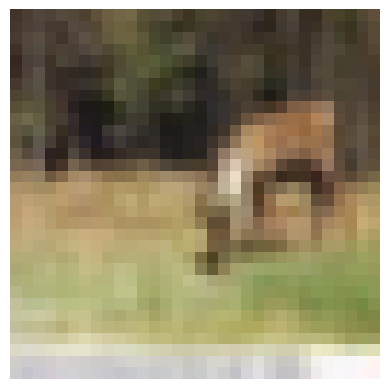

In [120]:
import matplotlib.pyplot as plt

plt.imshow(seq2_output[0])
plt.axis('off')
plt.show()

In [141]:
decoded_image_path = 'deoded_final_image.png'  # Specify the desired file path
decoded_neural_image = seq2_output[0].numpy()
plt.imsave(decoded_image_path, decoded_neural_image)

In [119]:
print(seq2_output)

tf.Tensor(
[[[[0.2544129  0.20489717 0.16784763]
   [0.2996387  0.23798402 0.19629657]
   [0.31761357 0.2750826  0.24379583]
   ...
   [0.25101838 0.23338512 0.14152029]
   [0.3257345  0.28898442 0.20256203]
   [0.38589785 0.31071052 0.23383094]]

  [[0.27601296 0.21598268 0.17632775]
   [0.30257076 0.24601178 0.21428116]
   [0.3127015  0.26551902 0.23326716]
   ...
   [0.22269417 0.20717174 0.12874644]
   [0.30044353 0.253078   0.19631667]
   [0.33945808 0.29127535 0.21835649]]

  [[0.28282773 0.22793815 0.18538979]
   [0.3272498  0.2754322  0.23747419]
   [0.35030422 0.30346957 0.26118276]
   ...
   [0.2349572  0.21022788 0.13360712]
   [0.28505874 0.23993899 0.1784121 ]
   [0.3352865  0.29221365 0.21806574]]

  ...

  [[0.85682344 0.8532353  0.78031015]
   [0.86574185 0.86081713 0.80544966]
   [0.8651014  0.86265254 0.79403   ]
   ...
   [0.836044   0.84741205 0.7163662 ]
   [0.8578468  0.8783755  0.72488815]
   [0.8738588  0.8780801  0.7207975 ]]

  [[0.81794214 0.80286074 0.786583

In [110]:
trainable_params = autoencoder.trainable_variables


In [ ]:
print(trainable_params)

In [94]:
# calculate the accuracy of the model
decoded_imgs = autoencoder.predict(X_test)
_, acc  = autoencoder.evaluate(decoded_imgs, X_test, steps=200)
print('> %.3f' % (acc * 100.0))

200/200 [==============================] - 11s 53ms/step - loss: 0.0027 - accuracy: 0.8127
> 81.275


In [95]:
index  = np.random.randint(len(X_test))
original = np.squeeze(X_test[index])
decoded = np.squeeze(decoded_imgs[index])

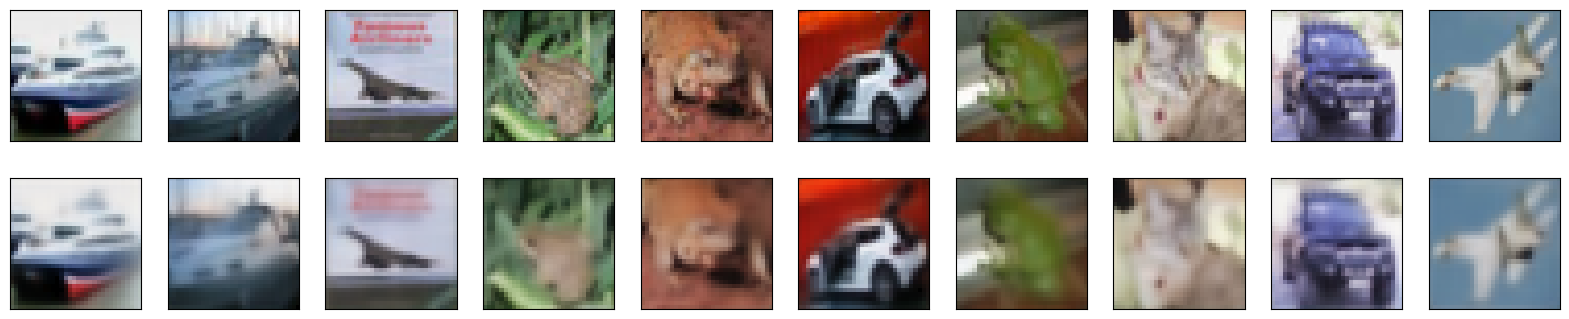

In [96]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [97]:
original_image_path = 'original.png'  # Specify the desired file path
plt.imsave(original_image_path, original)

In [98]:
neural_image_path = 'neural_image.png'  # Specify the desired file path
plt.imsave(neural_image_path, decoded)

In [123]:
image_path = '/content/original.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image, channels=3)  # Decode the PNG image
image = tf.image.convert_image_dtype(image, tf.float32)  # Convert image to float32


In [124]:
image_dft = tf.signal.fft2d(tf.complex(image, 0.0))

In [169]:
compression_ratio = 0.5
num_coeffs = int(image.shape[0] * image.shape[1] * compression_ratio)

In [170]:
image_dft_flat = tf.reshape(image_dft, [-1])
sorted_indices = tf.argsort(tf.abs(image_dft_flat), direction='DESCENDING')
sorted_coeffs = tf.gather(image_dft_flat, sorted_indices[:num_coeffs])

In [171]:
reconstructed_dft = tf.scatter_nd(tf.expand_dims(sorted_indices[:num_coeffs], axis=1), sorted_coeffs, tf.shape(image_dft_flat))
reconstructed_dft = tf.reshape(reconstructed_dft, image_dft.shape)
reconstructed_image = tf.abs(tf.signal.ifft2d(reconstructed_dft))

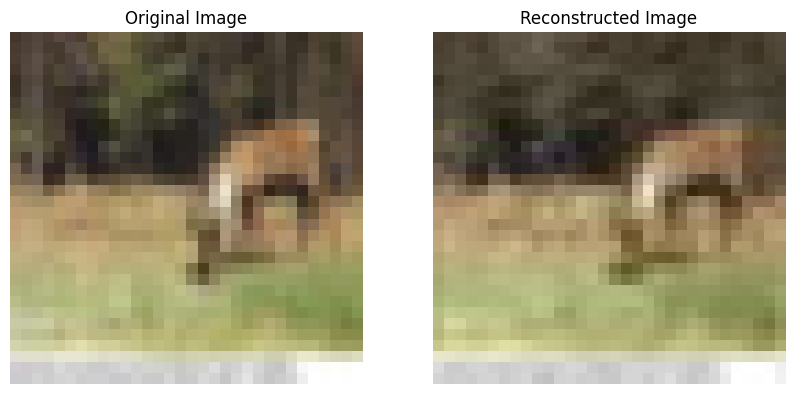

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image.numpy())
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(reconstructed_image.numpy())
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')
plt.show()

In [173]:
reconstructed_image_path = 'reconstructed_image.png'  # Specify the desired file path
reconstructed_image_np = tf.clip_by_value(reconstructed_image, 0.0, 1.0).numpy()

# reconstructed_image_np = reconstructed_image.numpy()

plt.imsave(reconstructed_image_path, np.squeeze(reconstructed_image_np))

In [144]:
import os
image_path = '/content/original.png'  # Specify the path to your image file
# Load the image using tf.io.read_file()
# original_image = tf.io.read_file(image_path)

# Get the size of the image in bytes
image_size_bytes = os.path.getsize(image_path)

# Convert the size from bytes to kilobytes
image_size_kb = image_size_bytes / 1024

# Print the size of the image in kilobytes
print('Image size:', image_size_kb, 'KB')



Image size: 2.5947265625 KB


In [174]:
image_path = '/content/reconstructed_image.png'  # Specify the path to your image file
# Load the image using tf.io.read_file()
# image = tf.io.read_file(image_path)

# Get the size of the image in bytes
image_size_bytes = os.path.getsize(image_path)

# Convert the size from bytes to kilobytes
image_size_kb = image_size_bytes / 1024

# Print the size of the image in kilobytes
print('Image size:', image_size_kb, 'KB')

Image size: 2.560546875 KB


In [138]:
# image_path = '/content/neural_image.png'  # Specify the path to your image file
# Load the image using tf.io.read_file()
# image = tf.io.read_file(image_path)

# Get the size of the image in bytes
image_size_bytes = os.path.getsize(decoded_image_path)

# Convert the size from bytes to kilobytes
image_size_kb = image_size_bytes / 1024

# Print the size of the image in kilobytes
print('Image size:', image_size_kb, 'KB')

Image size: 2.5439453125 KB


In [175]:
mse = mean_squared_error(image.numpy(), reconstructed_image.numpy())
psnr = peak_signal_noise_ratio(image.numpy(), reconstructed_image.numpy(), data_range=1.0)
ssim = structural_similarity(image.numpy(), reconstructed_image.numpy(), data_range=1.0, multichannel=True)
print('MSE:', mse)
print('PSNR:', psnr)
print('SSIM:', ssim)

MSE: 0.0007316562753098699
PSNR: 31.35692898170174
SSIM: 0.93862915


<ipython-input-175-34389d19ff5c>:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image.numpy(), reconstructed_image.numpy(), data_range=1.0, multichannel=True)


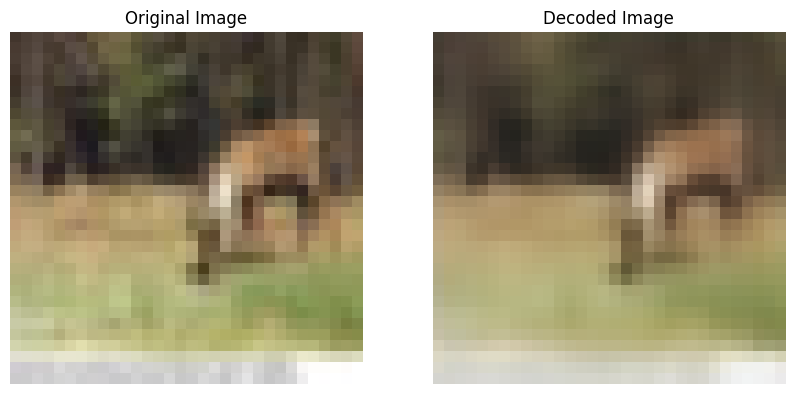

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image.numpy())
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(decoded)
axes[1].set_title('Decoded Image')
axes[1].axis('off')
plt.show()

In [142]:


mse = mean_squared_error(image.numpy(), decoded_neural_image)
psnr = peak_signal_noise_ratio(image.numpy(), decoded_neural_image, data_range=1.0)
ssim = structural_similarity(image.numpy(), decoded_neural_image, data_range=1.0, multichannel=True)
print('MSE:', mse)
print('PSNR:', psnr)
print('SSIM:', ssim)

MSE: 0.00019915408798293178
PSNR: 37.00810774515975
SSIM: 0.98668647


<ipython-input-142-3928fc1cb78c>:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image.numpy(), decoded_neural_image, data_range=1.0, multichannel=True)
